In [5]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Czech Barum'

link = 'https://rally-base.com/2023/barum-czech-rally-zlin-2023/?ssId='
startat, no_ss=7790, int(13) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [6]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [7]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [8]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,10,Wagner Si,RC2,00:07:07.0,80.68 0.00,00:00:00.0 00:00:00.0,1,Czech Barum,1
2,2,18,Kopecký J,RC2,00:07:07.4,80.61 0.04,00:00:00.4 00:00:00.4,1,Czech Barum,2
3,3,5,Lukyanuk,RC2,00:07:08.5,80.40 0.16,00:00:01.5 00:00:01.1,1,Czech Barum,3
4,4,11,Cais Erik,RC2,00:07:09.5,80.21 0.26,00:00:02.5 00:00:01.0,1,Czech Barum,4
5,5,14,Csomós Mi,RC2,00:07:11.0,79.94 0.42,00:00:04.0 00:00:01.5,1,Czech Barum,5
...,...,...,...,...,...,...,...,...,...,...
84,84,114,Hock Kare,RN10,00:20:34.2,74.79 16.08,00:06:52.2 00:00:08.8,7,Czech Barum,84
85,85,118,Liška Mil,RN10,00:21:02.0,73.14 17.16,00:07:20.0 00:00:27.8,7,Czech Barum,85
86,86,2,Østberg M,RC2,00:23:42.0,64.91 23.40,00:10:00.0 00:02:40.0,7,Czech Barum,86
87,87,40,Rossi Ghj,RC4,00:24:53.0,61.82 26.17,00:11:11.0 00:01:11.0,7,Czech Barum,87


In [10]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [11]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [12]:

rally2023_ClassView2

0                                Pos.                        
ss                                  1   2   3   4   5   6   7
No. Crew       Group Race                                    
1   Paddon  Ha RC2   Czech Barum    9  10   8  11   8   4   5
2   Østberg  M RC2   Czech Barum    8   7   2   4  29  89  86
3   Llarena  E RC2   Czech Barum   12  14  11  10  11   9  11
5   Lukyanuk   RC2   Czech Barum    3   2  10   9   3   4  43
6   Sesks  M.  RC2   Czech Barum   16  18  18  18  14  15  14
7   Franceschi RC2   Czech Barum   13  12  14  14   8  11  10
9   Mareš  Fil RC2   Czech Barum    6   9   7  15   6   3   9
10  Wagner  Si RC2   Czech Barum    1   8   5   7   5   7   8
11  Cais  Erik RC2   Czech Barum    4   6   4   1  10  88   1
12  McErlean   RC2   Czech Barum   17  13  15  13  13  10  12
14  Csomós  Mi RC2   Czech Barum    5   3   1   5   7   4   4
15  Tempestini RC2   Czech Barum   14  16  16  17  15  13  13
16  von Thurn  RC2   Czech Barum   18  19  19  19  17  14  18
17  László  Ma RC2   Czech Barum   19  24  34  96   -   -   -
18  Kopecký  J RC2   Czech Barum    2   4   6   2   2   1   1
19  Ingram  Ch RC2   Czech Barum   15  11   3  12   -   -   -
20  Stříteský  RC2   Czech Barum    6  15  12   8  11   8   7
21  Březík  Ad RC2   Czech Barum   10   5  13   6   4  12   6
22  Vlček  Mar RC2   Czech Barum   21  20  20  21  19  16  16
23  Kołtun  J. RC2   Czech Barum   25  27  24  27  22  17  19
24  Somaschini RC2   Czech Barum   41  44  54  47  36  87  38
25  Cuzma  Bog RC2   Czech Barum   28  43  36  38  26  86  32
45  Cvrček  V. RC2   Czech Barum   23  17  21  20  18  17  15
46  Jirásek  A RC2   Czech Barum   20  21  22  22  16  17  17
47  Jirovec  J RC2   Czech Barum   22  22  29  28  23  17  29
48  Trnovec  P RC2   Czech Barum   26  26  39  35  24  17  30
49  Kurka  Tom RC2   Czech Barum   27  23  31  24  20  17  25
50  Zedník  Pe RC2   Czech Barum   37  29  40  37  30  17  34
51  Vlček  Mar RC2   Czech Barum   29  34  45  50  39  17  37
53  Windisch   RC2   Czech Barum   56  53  52  58   -   -   -
54  László  Z. RC2   Czech Barum   38  35  49  49  38  17  41
55  Titov  Ant RC2   Czech Barum   50  58  58  57  45  17  55

In [13]:
rally2023_ClassView

0                                Pos.                         
ss                                  1    2   3   4   5   6   7
No. Crew       Group Race                                     
1   Paddon  Ha RC2   Czech Barum    9   10   8  11   8   4   5
2   Østberg  M RC2   Czech Barum    8    7   2   4  29  89  86
3   Llarena  E RC2   Czech Barum   12   14  11  10  11   9  11
5   Lukyanuk   RC2   Czech Barum    3    2  10   9   3   4  43
6   Sesks  M.  RC2   Czech Barum   16   18  18  18  14  15  14
...                               ...  ...  ..  ..  ..  ..  ..
115 Gajdošík   RN10  Czech Barum   89   90  77  77  77  17  70
116 Chlud  Iva RN6   Czech Barum  100   95  93  93  86  17  83
117 Valla  Rud RN6   Czech Barum  101   99  94  92  87  17  82
118 Liška  Mil RN10  Czech Barum  102  102  97  95  90  17  85
119 Kowalczyk  RC4 I Czech Barum   44   77  61  80  48  17  44

[105 rows x 7 columns]

In [14]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,10,Wagner Si,RC2,1,Czech Barum,1,427.0
2,18,Kopecký J,RC2,1,Czech Barum,2,427.4
3,5,Lukyanuk,RC2,1,Czech Barum,3,428.5
4,11,Cais Erik,RC2,1,Czech Barum,4,429.5
5,14,Csomós Mi,RC2,1,Czech Barum,5,431.0
...,...,...,...,...,...,...,...
84,114,Hock Kare,RN10,7,Czech Barum,84,1234.2
85,118,Liška Mil,RN10,7,Czech Barum,85,1262.0
86,2,Østberg M,RC2,7,Czech Barum,86,1422.0
87,40,Rossi Ghj,RC4,7,Czech Barum,87,1493.0


In [15]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race        ss          
Czech Barum 1      427.0
            2      457.0
            3      379.0
            4      830.9
            5      450.7
            6      377.8
            7      822.0

In [16]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,10,Wagner Si,RC2,1,Czech Barum,1,427.0,427.0
1,18,Kopecký J,RC2,1,Czech Barum,2,427.4,427.0
2,5,Lukyanuk,RC2,1,Czech Barum,3,428.5,427.0
3,11,Cais Erik,RC2,1,Czech Barum,4,429.5,427.0
4,14,Csomós Mi,RC2,1,Czech Barum,5,431.0,427.0
...,...,...,...,...,...,...,...,...
673,114,Hock Kare,RN10,7,Czech Barum,84,1234.2,822.0
674,118,Liška Mil,RN10,7,Czech Barum,85,1262.0,822.0
675,2,Østberg M,RC2,7,Czech Barum,86,1422.0,822.0
676,40,Rossi Ghj,RC4,7,Czech Barum,87,1493.0,822.0


In [17]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,10,Wagner Si,RC2,1,Czech Barum,1,427.0,427.0,0.0,0.000000,01
1,18,Kopecký J,RC2,1,Czech Barum,2,427.4,427.0,0.4,0.093677,01
2,5,Lukyanuk,RC2,1,Czech Barum,3,428.5,427.0,1.5,0.351288,01
3,11,Cais Erik,RC2,1,Czech Barum,4,429.5,427.0,2.5,0.585480,01
4,14,Csomós Mi,RC2,1,Czech Barum,5,431.0,427.0,4.0,0.936768,01
...,...,...,...,...,...,...,...,...,...,...,...
673,114,Hock Kare,RN10,7,Czech Barum,84,1234.2,822.0,412.2,50.145985,07
674,118,Liška Mil,RN10,7,Czech Barum,85,1262.0,822.0,440.0,53.527981,07
675,2,Østberg M,RC2,7,Czech Barum,86,1422.0,822.0,600.0,72.992701,07
676,40,Rossi Ghj,RC4,7,Czech Barum,87,1493.0,822.0,671.0,81.630170,07


In [18]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,10,Wagner Si,RC2,1,Czech Barum,1,427.0,427.0,0.0,0.000000,01
1,18,Kopecký J,RC2,1,Czech Barum,2,427.4,427.0,0.4,0.093677,01
2,5,Lukyanuk,RC2,1,Czech Barum,3,428.5,427.0,1.5,0.351288,01
3,11,Cais Erik,RC2,1,Czech Barum,4,429.5,427.0,2.5,0.585480,01
4,14,Csomós Mi,RC2,1,Czech Barum,5,431.0,427.0,4.0,0.936768,01
...,...,...,...,...,...,...,...,...,...,...,...
627,24,Somaschini,RC2,7,Czech Barum,38,958.1,822.0,136.1,16.557178,07
630,54,László Z.,RC2,7,Czech Barum,41,969.8,822.0,147.8,17.980535,07
632,5,Lukyanuk,RC2,7,Czech Barum,43,973.3,822.0,151.3,18.406326,07
644,55,Titov Ant,RC2,7,Czech Barum,55,1016.6,822.0,194.6,23.673966,07


In [25]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,24,Crugnola,RC2,1,Roma Capitale,1,57.2,57.2,0.0,0.000000,01
1,4,Lukyanuk,RC2,1,Roma Capitale,2,57.5,57.2,0.3,0.524476,01
2,59,Aragno F.,RC2,1,Roma Capitale,3,57.7,57.2,0.5,0.874126,01
3,21,Basso G.,RC2,1,Roma Capitale,4,57.8,57.2,0.6,1.048951,01
4,3,Mabellini,RC2,1,Roma Capitale,5,58.1,57.2,0.9,1.573427,01
...,...,...,...,...,...,...,...,...,...,...,...
1049,70,Mauri Mau,RC2,13,Roma Capitale,28,237.2,221.4,15.8,7.136405,13
1050,75,László Z.,RC2,13,Roma Capitale,29,239.7,221.4,18.3,8.265583,13
1058,73,Caires Mi,RC2,13,Roma Capitale,37,244.1,221.4,22.7,10.252936,13
1059,71,Brazzoli,RC2,13,Roma Capitale,38,244.5,221.4,23.1,10.433604,13


In [19]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Czech Barum                                           
SS.                 01     02     03     04     05      06     07
Crew                                                             
Březík  Ad         6.2   4.70   9.10   13.2   4.30    8.30   10.1
Cais  Erik         2.5   5.00   2.60    0.0   8.90   81.10    0.0
Csomós  Mi         4.0   4.40   0.00    9.4   7.20    1.80    2.8
Cuzma  Bog        39.2  55.30  48.00  116.4  40.20   41.70  101.4
Cvrček  V.        26.1  15.30  24.60   47.1  18.90   24.20   47.2
Franceschi         8.9  10.40  10.30   22.2   8.20    7.60   12.5
Ingram  Ch         9.7   9.40   2.30   18.8    NaN     NaN    NaN
Jirovec  J        26.0  25.10  37.20   84.5  31.70   24.20   94.6
Jirásek  A        20.8  22.00  25.20   58.4  15.70   24.20   55.8
Kopecký  J         0.4   4.50   3.70    3.3   2.80    0.00    0.0
Kołtun  J.        31.0  35.10  30.80   84.3  26.30   24.20   70.2
Kurka  Tom        38.4  25.80  37.90   77.9  22.60   24.20   84.6
Llarena  E         8.7  11.20   8.60   17.4  10.10    5.50   12.9
Lukyanuk           1.5   2.70   6.50   15.4   3.60    1.80  151.3
László  Ma        17.4  27.50  40.70  600.0    NaN     NaN    NaN
László  Z.        49.0  47.30  63.80  141.0  50.20   24.20  147.8
Mareš  Fil         4.6   8.40   4.70   23.4   6.90    1.30   12.3
McErlean          15.8  10.80  11.50   20.2  11.20    7.50   17.8
Paddon  Ha         5.9   9.10   4.90   18.7   8.20    1.80    8.9
Sesks  M.         13.0  17.00  13.40   32.7  13.40   14.70   22.8
Somaschini        51.5  55.80  73.80  138.2  48.40   65.10  136.1
Stříteský          4.6  12.20   8.80   13.9  10.10    3.20   11.3
Tempestini         9.3  15.00  11.80   32.0  14.70    8.90   21.0
Titov  Ant        64.9  70.90  77.80  170.7  62.90   24.20  194.6
Trnovec  P        37.5  33.70  48.80  105.6  32.70   24.20   97.4
Vlček  Mar        32.6  33.95  41.05  100.0  35.05   24.15   94.7
Wagner  Si         0.0   6.40   2.70   13.3   6.60    2.30   12.1
Windisch          68.0  68.50  67.80  171.6    NaN     NaN    NaN
Zedník  Pe        48.4  40.00  53.20  111.9  43.30   24.20  116.1
von Thurn         16.1  18.10  15.20   40.7  17.00   14.10   65.4
Østberg  M         5.3   5.40   2.20    6.6  42.60  600.00  600.0

Text(0.5, 1.0, 'Czech Barum\nDiference between RC1 Participants and Stage winer (sec)')

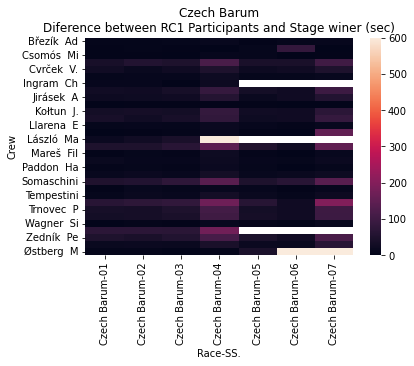

In [20]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

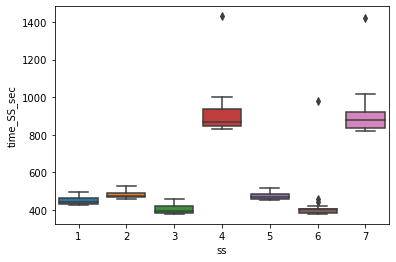

In [21]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

Text(0.5, 1.0, 'Czech Barum\nDiference between RC1 Participants and Stage winer (%)')

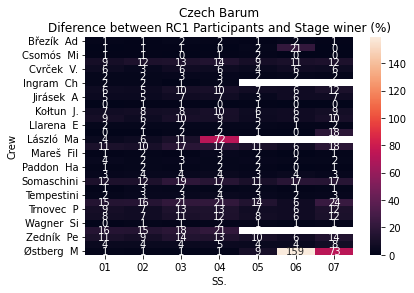

In [22]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")